## task-1 Supervised learning

In [83]:
# importing neccessely libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# loading the data
file_id = "1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "global_riverine_plastic_emissions_into_ocean.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd
To: /content/global_riverine_plastic_emissions_into_ocean.csv
100%|██████████| 11.0k/11.0k [00:00<00:00, 22.6MB/s]


'global_riverine_plastic_emissions_into_ocean.csv'

In [ ]:
## Load into pandas:
import pandas as pd

df = pd.read_csv("global_riverine_plastic_emissions_into_ocean.csv")
df

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,912'557,2'800,1'875,0.0030,6.0,0.39%,671'431,5'988,0.89%,NaN,NaN,NaN,NaN
161,Vietnam,327'732,3'444,1'772,0.0100,19.0,1.60%,1'112'790,28'221,2.54%,NaN,NaN,NaN,NaN
162,Western Sahara,266'830,111,35,0.0004,0.0,0.11%,4'114,38,0.91%,NaN,NaN,NaN,NaN
163,Yemen,419'900,1'906,112,0.0050,1.0,0.07%,291'737,252,0.09%,NaN,NaN,NaN,NaN


In [ ]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country or Administrative area  163 non-null    object 
 1   Area [km2]                      163 non-null    object 
 2   Coast length [km]               163 non-null    object 
 3   Rainfall [mm year -1]           163 non-null    object 
 4   Factor L/A [-]                  163 non-null    float64
 5   Factor (L/A) *P [-]             163 non-null    float64
 6   P[E] [%]                        163 non-null    object 
 7   MPW (metric tons year -1)       163 non-null    object 
 8   M[E] (metric tons year -1)      163 non-null    object 
 9   Ratio Me/MPW                    163 non-null    object 
 10  Unnamed: 10                     0 non-null      float64
 11  Unnamed: 11                     0 non-null      float64
 12  Unnamed: 12                     0 no

In [ ]:
# staticstacal summery of the dataset
df.describe()

,Factor L/A [-],Factor (L/A) *P [-],Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,163.000000,163.000000,0.0,0.0,0.0,0.0
mean,0.168088,250.717791,NaN,NaN,NaN,NaN
std,0.513505,949.635716,NaN,NaN,NaN,NaN
min,0.000010,0.000000,NaN,NaN,NaN,NaN
25%,0.002000,2.000000,NaN,NaN,NaN,NaN
50%,0.009000,9.000000,NaN,NaN,NaN,NaN
75%,0.070000,93.500000,NaN,NaN,NaN,NaN
max,4.000000,9129.000000,NaN,NaN,NaN,NaN


In [ ]:
# total num of nan with in each column
df.isna().sum()

,0
Country or Administrative area,2
Area [km2],2
Coast length [km],2
Rainfall [mm year -1],2
Factor L/A [-],2
Factor (L/A) *P [-],2
P[E] [%],2
MPW (metric tons year -1),2
M[E] (metric tons year -1),2
Ratio Me/MPW,2


In [ ]:
# Drop rows with missing values
df_clean=df.dropna(axis=1,how="all",inplace=False).copy()
columns=df_clean.columns
columns

Index(['Area [km2]', 'Coast length [km]', 'Rainfall [mm year -1]',
       'Factor L/A [-]', 'Factor (L/A) *P [-]', 'MPW (metric tons year -1)',
       'M[E] (metric tons year -1)'],
      dtype='object')

In [ ]:
# Clean the column to remove any commas or apostrophes
for col in columns:
  df_clean[col]=pd.to_numeric(df_clean[col].astype(str).str.replace(",","",regex=False).str.replace("'","",regex=False),errors='coerce')

df_clean

,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],MPW (metric tons year -1),M[E] (metric tons year -1)
0,28486.0,362.0,1117.0,0.0100,14.0,69833.0,1565.0
1,2316559.0,998.0,80.0,0.0004,0.0,764578.0,5774.0
2,1247357.0,1600.0,1025.0,0.0010,1.0,236946.0,860.0
3,443.0,153.0,996.0,0.3000,344.0,627.0,2.0
4,2779705.0,4989.0,567.0,0.0020,1.0,465808.0,4137.0
...,...,...,...,...,...,...,...
160,912557.0,2800.0,1875.0,0.0030,6.0,671431.0,5988.0
161,327732.0,3444.0,1772.0,0.0100,19.0,1112790.0,28221.0
162,266830.0,111.0,35.0,0.0004,0.0,4114.0,38.0
163,419900.0,1906.0,112.0,0.0050,1.0,291737.0,252.0


In [ ]:
#creating new column
df_clean['plastic_contribution'] = df_clean['M[E] (metric tons year -1)'].apply(
    lambda x: 0 if x > 6008 else 1
)
columns=df_clean.columns
columns

Index(['Area [km2]', 'Coast length [km]', 'Rainfall [mm year -1]',
       'Factor L/A [-]', 'Factor (L/A) *P [-]', 'MPW (metric tons year -1)',
       'M[E] (metric tons year -1)', 'plastic_contribution'],
      dtype='object')

## devided the dataset into target variabe and predictors

In [ ]:
y=df_clean['plastic_contribution']   #for target varible
x=df_clean.drop(inplace=False,axis=1,columns=['plastic_contribution','M[E] (metric tons year -1)'])  # for predictor variables

## standardize the dataset

In [ ]:
# create scaler object
scale=StandardScaler()

# fit the data and transform
x_scaled=scale.fit_transform(x)

## split the dataset to traning and testing dataset to train the ML model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

## train the ML model

In [ ]:
#create LogisticRegression model
model=LogisticRegression()

# train the lr model with the training data
model.fit(x_train,y_train)

#get predict from the model using testing data
y_predict=model.predict(x_test)

## Evaluation of the model

In [ ]:
accuracy=accuracy_score(y_test,y_predict)

# evaluation using precition,recall and F1
report=classification_report(y_test,y_predict)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.91      1.00      0.95        29

    accuracy                           0.91        33
   macro avg       0.95      0.62      0.68        33
weighted avg       0.92      0.91      0.88        33



## cross validation for the model

In [ ]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Fill missing values with mean
    StandardScaler(),                 # Scale features
    LogisticRegression()             # Logistic Regression model
)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(pipeline, x_scaled, y, cv=5, scoring=scoring)

print("Accuracy:", np.mean(results['test_accuracy']))
print("Precision:", np.mean(results['test_precision']))
print("Recall:", np.mean(results['test_recall']))
print("F1-score:", np.mean(results['test_f1']))


Accuracy: 0.9212121212121213
Precision: 0.9253543499511242
Recall: 0.9933333333333334
F1-score: 0.9579058699101004


## Finding best predictor variables

In [ ]:
# Save the column names
feature_columns = x.columns

# Replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x_scaled)

# Feature selection (top 5)
selector = SelectKBest(score_func=f_classif, k=5)
x_selected = selector.fit_transform(x_imputed, y)

# Get selected feature names using boolean mask on `feature_columns`
selected_features = feature_columns[selector.get_support()]
print("Top 5 features:", list(selected_features))

Top 5 features: ['Area [km2]', 'Coast length [km]', 'Rainfall [mm year -1]', 'Factor L/A [-]', 'MPW (metric tons year -1)']


## saving the model

In [ ]:
# save model
joblib.dump(model,"PlasticContributionClassifier.joblib")

['PlasticContributionClassifier.joblib']

### **task-2 unsupervised learning **

In [58]:
# to find the number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_imputed)
  wcss.append(kmeans.inertia_)

## plot the Elbow digram

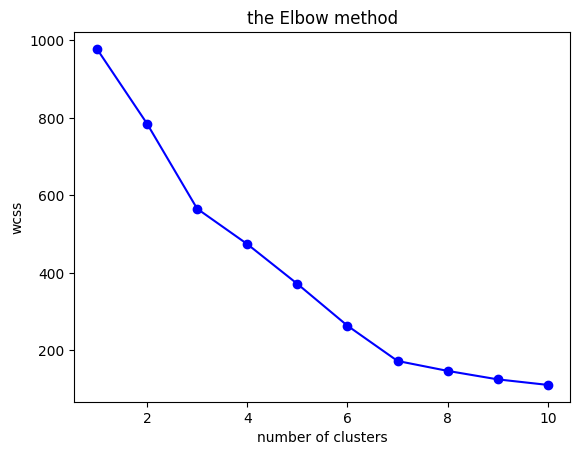

In [59]:
plt.plot(range(1,11),wcss,"bo-")
plt.title("the Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [68]:
# apply kmeans k=3 based on the the elbow model
kmeans=KMeans(n_clusters=2,random_state=42)
y_kmeans=kmeans.fit_predict(x_imputed)
df_clean["cluster"]=y_kmeans

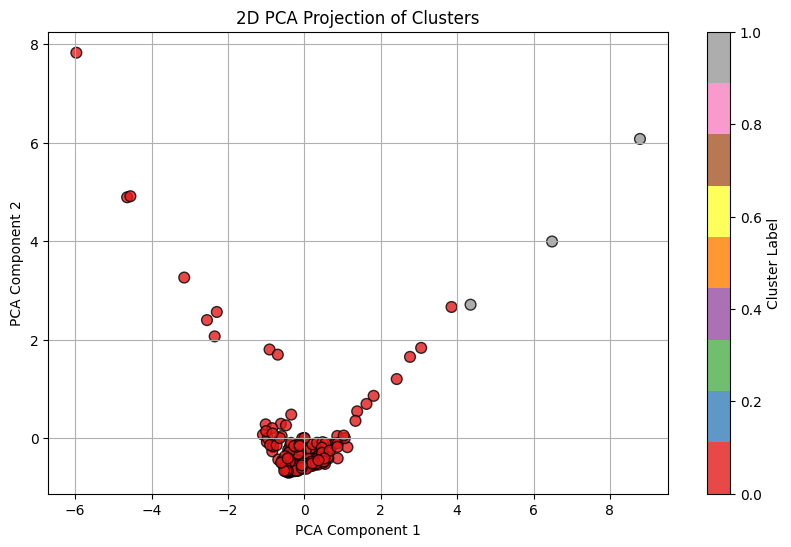

In [69]:
# PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_imputed)

#  Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='Set1', s=60, edgecolor='k', alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection of Clusters")
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

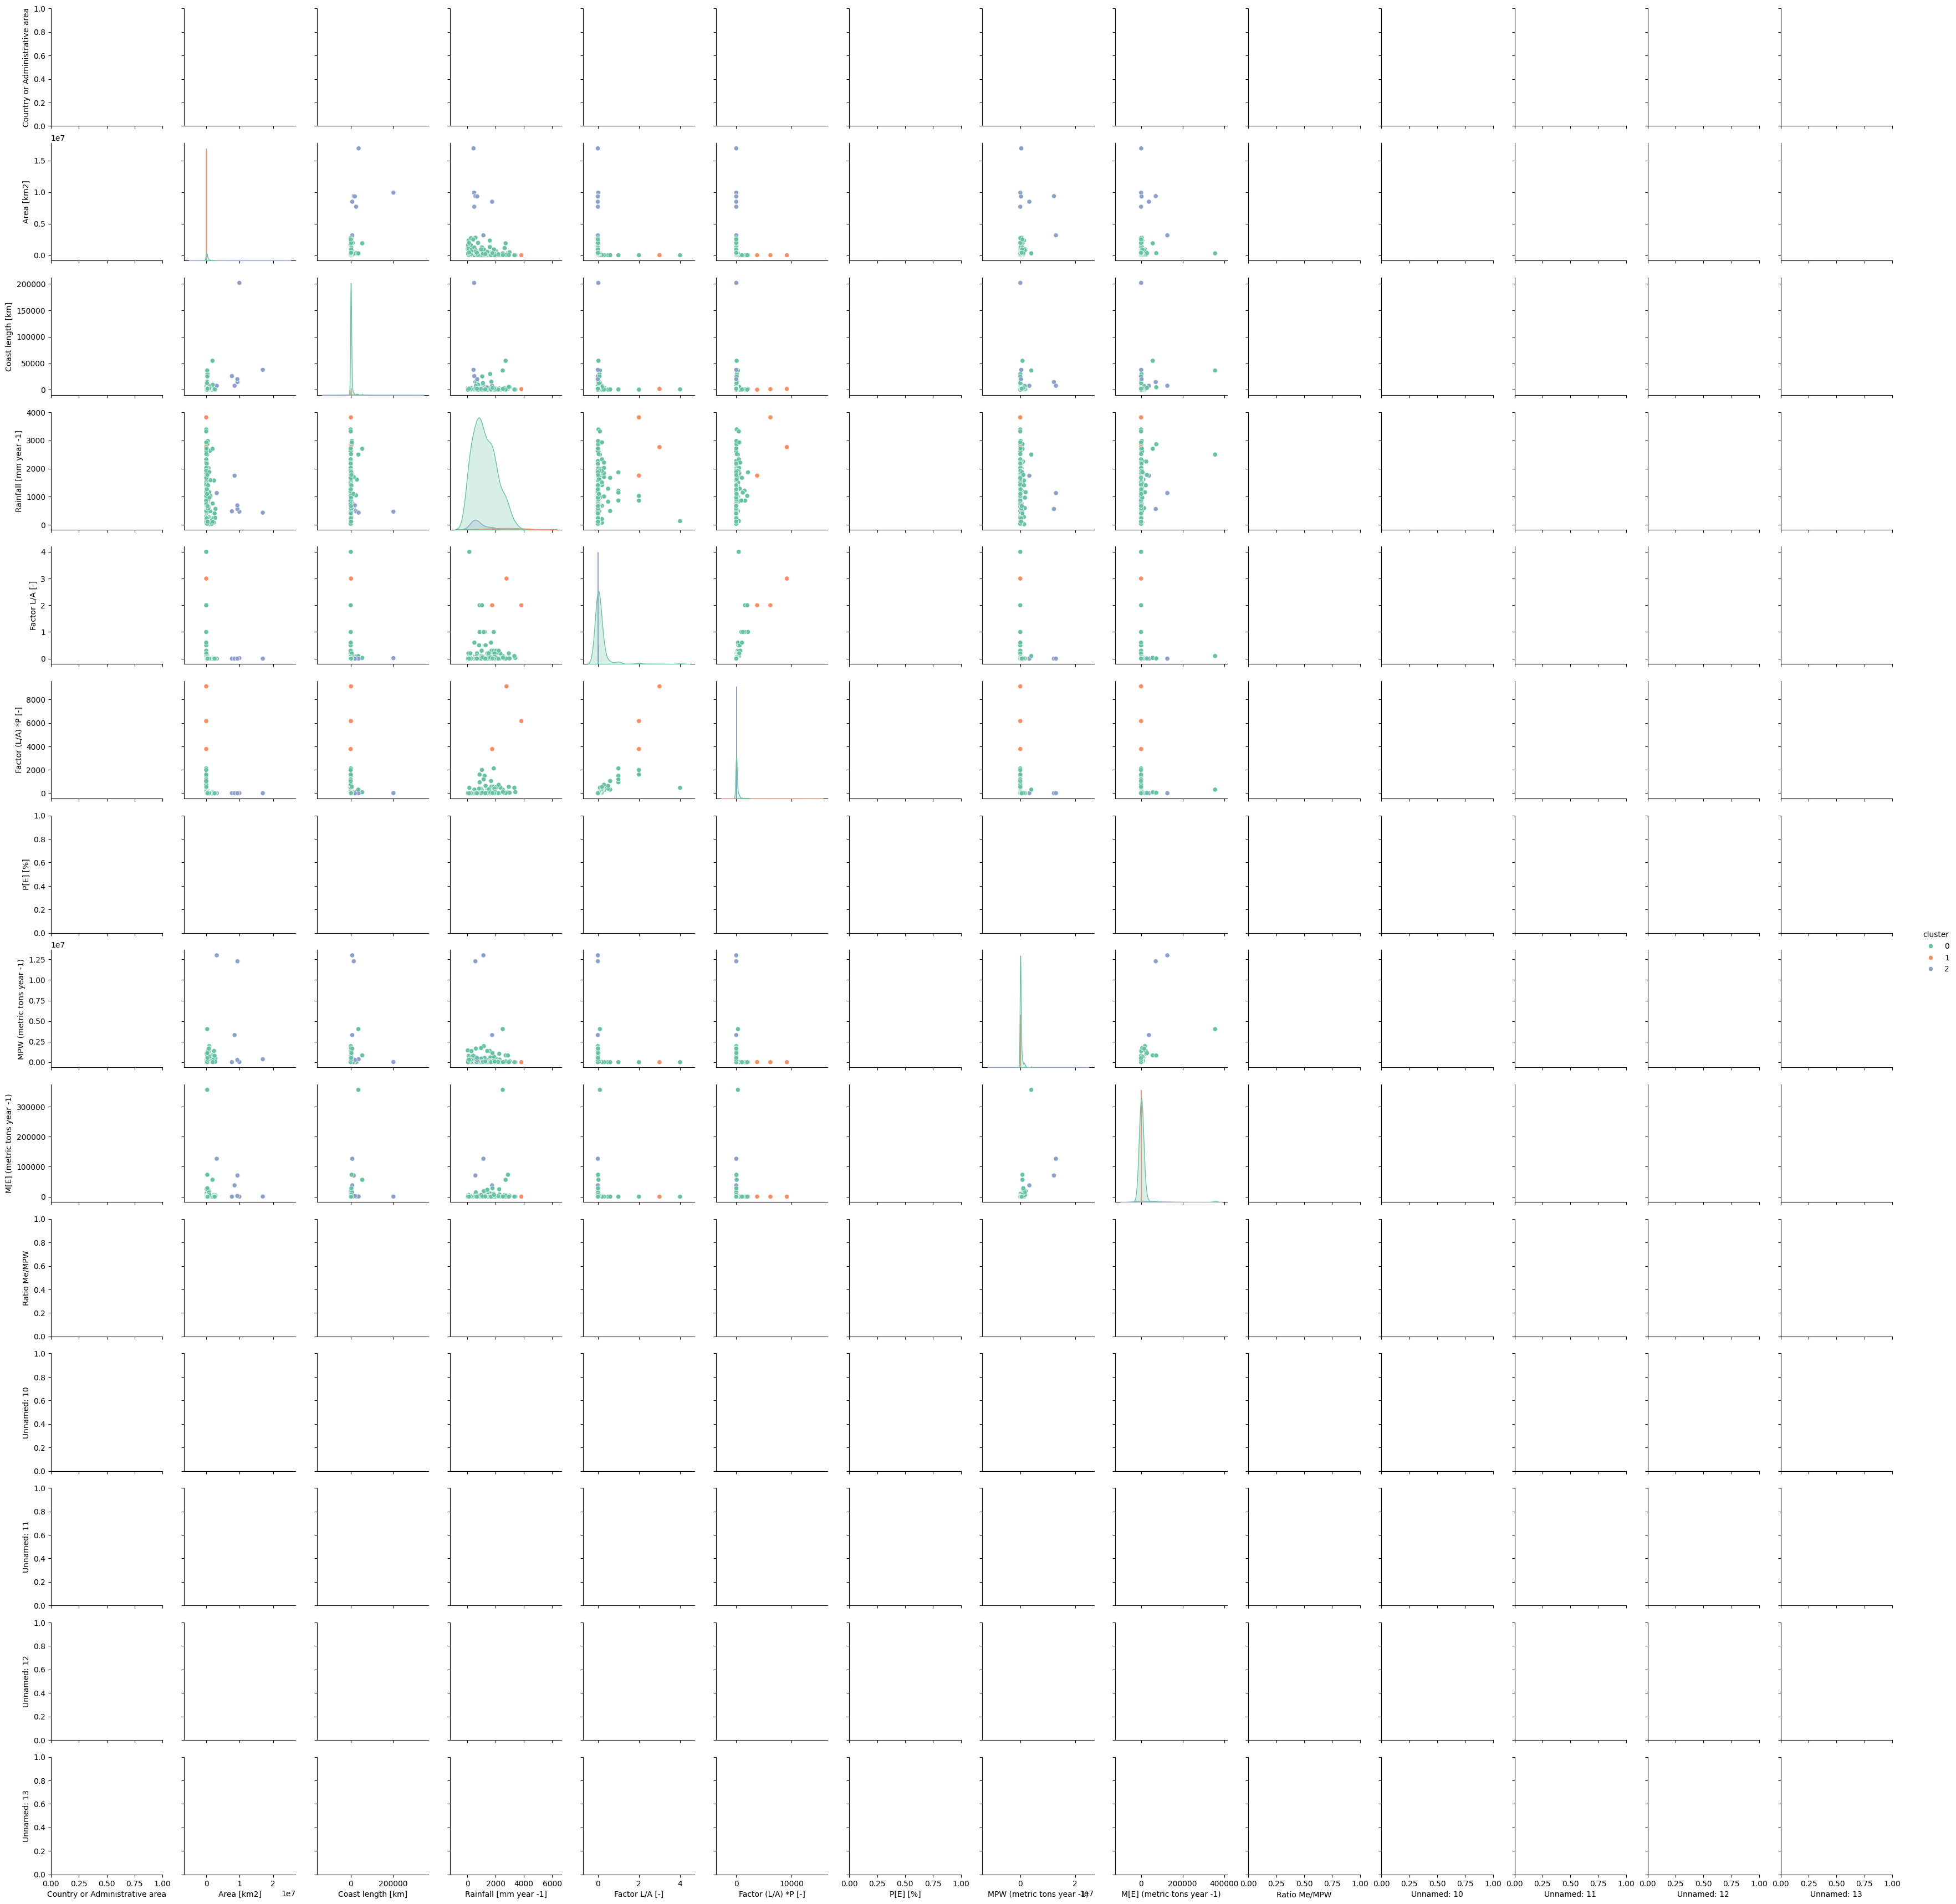

In [70]:
sns.pairplot(df, hue='cluster', palette='Set2')

# check the predition of supervised model to the clustering group

In [71]:
## Cross Tabulation
pd.crosstab(df_clean['plastic_contribution'], df_clean['cluster'])


cluster,0,1
plastic_contribution,,
0,16,0
1,146,3


In [82]:

# Get the exact feature names used in x_imputed
feature_columns = x.columns  # same columns used before scaling/imputing

# Fit Random Forest on cluster labels
rf = RandomForestClassifier(random_state=42)
rf.fit(x_imputed, df_clean.loc[x.index, 'cluster'])

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=feature_columns)

# Display top features
top_features = importances.sort_values(ascending=False)
print(" Top 3 features influencing the clusters:\n")
print(top_features.head(3))


 Top features influencing the clusters:

Factor (L/A) *P [-]      0.472569
Factor L/A [-]           0.188390
Rainfall [mm year -1]    0.141270
dtype: float64
